## 0. ÌïÑÏöî Ìå®ÌÇ§ÏßÄ Î∞è ÎùºÏù¥Î∏åÎü¨Î¶¨ import

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
sub_data_path = join(data_dir, 'test.csv')      # ÌÖåÏä§Ìä∏, Ï¶â submission Ïãú ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú

print(train_data_path)
print(sub_data_path)

/home/aiffel-dj62/aiffel/kaggle_kakr_housing/data/train.csv
/home/aiffel-dj62/aiffel/kaggle_kakr_housing/data/test.csv


## 1. Îç∞Ïù¥ÌÑ∞ ÏÇ¥Ìé¥Î≥¥Í∏∞
pandasÏùò read_csv Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥Ïò§Í≥†, Í∞Å Î≥ÄÏàòÎì§Ïù¥ ÎÇòÌÉÄÎÇ¥Îäî ÏùòÎØ∏Î•º ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.
1. ID : ÏßëÏùÑ Íµ¨Î∂ÑÌïòÎäî Î≤àÌò∏
2. date : ÏßëÏùÑ Íµ¨Îß§Ìïú ÎÇ†Ïßú
3. price : ÌÉÄÍ≤ü Î≥ÄÏàòÏù∏ ÏßëÏùò Í∞ÄÍ≤©
4. bedrooms : Ïπ®Ïã§Ïùò Ïàò
5. bathrooms : Ïπ®Ïã§Îãπ ÌôîÏû•Ïã§ Í∞úÏàò
6. sqft_living : Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏
7. sqft_lot : Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏
8. floors : ÏßëÏùò Ï∏µ Ïàò
9. waterfront : ÏßëÏùò Ï†ÑÎ∞©Ïóê Í∞ïÏù¥ ÌùêÎ•¥ÎäîÏßÄ Ïú†Î¨¥ (a.k.a. Î¶¨Î≤ÑÎ∑∞)
10. view : ÏßëÏù¥ ÏñºÎßàÎÇò Ï¢ãÏïÑ Î≥¥Ïù¥ÎäîÏßÄÏùò Ï†ïÎèÑ
11. condition : ÏßëÏùò Ï†ÑÎ∞òÏ†ÅÏù∏ ÏÉÅÌÉú
12. grade : King County grading ÏãúÏä§ÌÖú Í∏∞Ï§ÄÏúºÎ°ú Îß§Í∏¥ ÏßëÏùò Îì±Í∏â
13. sqft_above : ÏßÄÌïòÏã§ÏùÑ Ï†úÏô∏Ìïú ÌèâÎ∞© ÌîºÌä∏
14. sqft_basement : ÏßÄÌïòÏã§Ïùò ÌèâÎ∞© ÌîºÌä∏
15. yr_built : ÏßëÏùÑ ÏßÄÏùÄ ÎÖÑÎèÑ - ÎÖÑÏãùÏóê Îî∞Î•∏ Í∞êÍ∞ÄÏÉÅÍ∞ÅÏù¥ Î∞úÏÉùÌï† Ïàò ÏûàÏùå
16. yr_renovated : ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌïú ÎÖÑÎèÑ - ÎÖÑÏãùÏóê Îî∞Î•∏ Í∞êÍ∞ÄÏÉÅÍ∞ÅÏù¥ Î∞úÏÉùÌï† Ïàò ÏûàÏùå
17. zipcode : Ïö∞Ìé∏Î≤àÌò∏ - Í∞ôÏùÄ ÏßÄÏó≠Ïùò ÏßëÍ∞íÏùÄ ÎπÑÏä∑Ìï† Ïàò ÏûàÏùå. Ïö∞Ìé∏Î≤àÌò∏Î°ú Íµ¨Î∂Ñ Í∞ÄÎä•?
18. lat : ÏúÑÎèÑ
19. long : Í≤ΩÎèÑ
20. sqft_living15 : 2015ÎÖÑ Í∏∞Ï§Ä Ï£ºÍ±∞ Í≥µÍ∞ÑÏùò ÌèâÎ∞© ÌîºÌä∏(ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå)
21. sqft_lot15 : 2015ÎÖÑ Í∏∞Ï§Ä Î∂ÄÏßÄÏùò ÌèâÎ∞© ÌîºÌä∏(ÏßëÏùÑ Ïû¨Í±¥Ï∂ïÌñàÎã§Î©¥, Î≥ÄÌôîÍ∞Ä ÏûàÏùÑ Ïàò ÏûàÏùå)

In [3]:
data = pd.read_csv(train_data_path)
sub = pd.read_csv(sub_data_path)
# test dataÏóêÎäî Ï¢ÖÏÜçÎ≥ÄÏàòÍ∞Ä Îπ†Ï†∏ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ïª¨ÎüºÏù¥ ÌïòÎÇò Ï†ÅÏùå
# print(data.describe()) # Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏

print('train data dim : {}'.format(data.shape))
print('sub data dim : {}'.format(sub.shape))

train data dim : (15035, 21)
sub data dim : (6468, 20)


ÏãúÎèÑÌïòÍ≥†Ïûê ÌïòÎäî Î∂ÑÏÑùÏùÄ ÏßëÍ∞í ÏòàÏ∏°ÏúºÎ°ú Ïñ¥Îñ§ Î≥ÄÏàòÍ∞Ä Í∞ÄÍ≤©Ïóê ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäîÏßÄ ÏïåÏïÑÎ≥¥Í≥†Ïûê ÏÉÅÍ¥ÄÎ∂ÑÏÑùÏùÑ Ïã§ÏãúÌïòÍ≥† ÏãúÍ∞ÅÌôî ÌïòÏòÄÏäµÎãàÎã§.

['price' 'grade' 'sqft_living' 'sqft_living15' 'sqft_above' 'bathrooms'
 'lat' 'bedrooms' 'floors' 'view']


<AxesSubplot:>

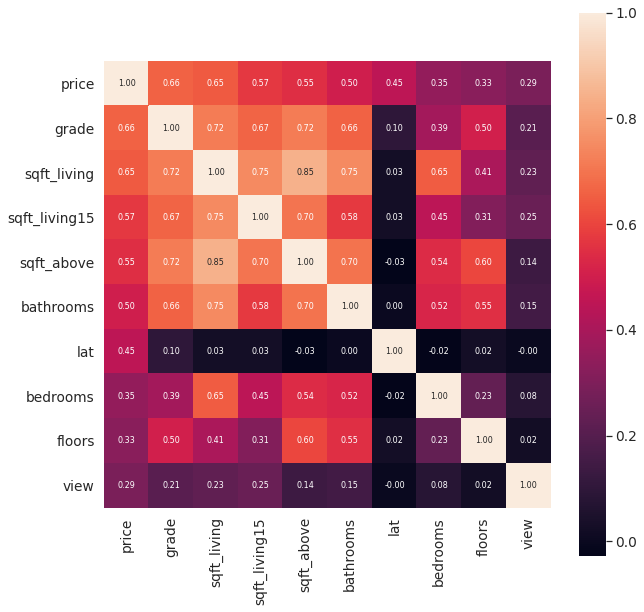

In [4]:
# correlationÏù¥ ÎÜíÏùÄ ÏÉÅÏúÑ 10Í∞úÏùò heatmap
# continuous + sequential variables --> spearman
# absÎäî Î∞òÎπÑÎ°ÄÍ¥ÄÍ≥ÑÎèÑ Í≥†Î†§ÌïòÍ∏∞ ÏúÑÌï®
# https://www.kaggle.com/junoindatascience/let-s-eda-it Ï§ÄÌò∏ÎãòÏù¥ ÏàòÏ†ïÌï¥ Ï§Ä ÏΩîÎìúÎ°ú ÏÇ¨Ïö©ÌïòÏòÄÏäµÎãàÎã§. 
import scipy as sp

cor_abs = abs(data.corr(method='spearman')) 
cor_cols = cor_abs.nlargest(n=10, columns='price').index # priceÏôÄ correlationÏù¥ ÎÜíÏùÄ column 10Í∞ú ÎΩëÍ∏∞(ÎÇ¥Î¶ºÏ∞®Ïàú)
# spearman coefficient matrix
cor = np.array(sp.stats.spearmanr(data[cor_cols].values))[0] # 10 x 10
print(cor_cols.values)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
sns.heatmap(cor, fmt='.2f', annot=True, square=True , annot_kws={'size' : 8} ,xticklabels=cor_cols.values, yticklabels=cor_cols.values)

In [5]:
# data = data[['price', 'grade', 'sqft_living', 'sqft_living15', 'sqft_above', 'bathrooms', 'lat', 'bedrooms', 'floors', 'view']]
# data
# sub = sub[['grade', 'sqft_living', 'sqft_living15', 'sqft_above', 'bathrooms', 'lat', 'bedrooms', 'floors', 'view']]
# sub

In [6]:
# # ÏÉÅÍ¥ÄÏù¥ ÎÇÆÏùÄ Ïª¨Îüº Ï†úÍ±∞
# data = data.drop(['sqft_living15', 'view'], axis = 1)
# sub = sub.drop(['sqft_living15', 'view'], axis = 1)

In [7]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
# ## Ï†ÑÏßÑ Îã®Í≥ÑÎ≥Ñ ÏÑ†ÌÉùÎ≤ï
# import statsmodels.api as sm

# variables = data.drop(['price'], axis = 1).tolist() ## ÏÑ§Î™Ö Î≥ÄÏàò Î¶¨Ïä§Ìä∏
 
# y = data['price'] ## Î∞òÏùë Î≥ÄÏàò
# selected_variables = [] ## ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎì§
# sl_enter = 0.05
# sl_remove = 0.05
 
# sv_per_step = [] ## Í∞Å Ïä§ÌÖùÎ≥ÑÎ°ú ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎì§
# adjusted_r_squared = [] ## Í∞Å Ïä§ÌÖùÎ≥Ñ ÏàòÏ†ïÎêú Í≤∞Ï†ïÍ≥ÑÏàò
# steps = [] ## Ïä§ÌÖù
# step = 0
# while len(variables) > 0:
#     remainder = list(set(variables) - set(selected_variables))
#     pval = pd.Series(index=remainder) ## Î≥ÄÏàòÏùò p-value
#     print(pval)
#     ## Í∏∞Ï°¥Ïóê Ìè¨Ìï®Îêú Î≥ÄÏàòÏôÄ ÏÉàÎ°úÏö¥ Î≥ÄÏàò ÌïòÎÇòÏî© ÎèåÏïÑÍ∞ÄÎ©¥ÏÑú 
#     ## ÏÑ†Ìòï Î™®ÌòïÏùÑ Ï†ÅÌï©ÌïúÎã§.
#     for col in remainder: 
#         X = data[selected_variables+[col]]
#         X = sm.add_constant(X)
#         y = np.asarray(y)
#         X = np.asarray(X)
#         model = sm.OLS(y,X).fit()
#         pval[col] = model.pvalues[col]
 
#     min_pval = pval.min()
#     if min_pval < sl_enter: ## ÏµúÏÜå p-value Í∞íÏù¥ Í∏∞Ï§Ä Í∞íÎ≥¥Îã§ ÏûëÏúºÎ©¥ Ìè¨Ìï®
#         selected_variables.append(pval.idxmin())
#         ## ÏÑ†ÌÉùÎêú Î≥ÄÏàòÎì§ÏóêÎåÄÌï¥ÏÑú
#         ## Ïñ¥Îñ§ Î≥ÄÏàòÎ•º Ï†úÍ±∞Ìï†ÏßÄ Í≥†Î•∏Îã§.
#         while len(selected_variables) > 0:
#             selected_X = data[selected_variables]
#             selected_X = sm.add_constant(selected_X)
#             selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## Ï†àÌé∏Ìï≠Ïùò p-valueÎäî Î∫ÄÎã§
#             max_pval = selected_pval.max()
#             if max_pval >= sl_remove: ## ÏµúÎåÄ p-valueÍ∞íÏù¥ Í∏∞Ï§ÄÍ∞íÎ≥¥Îã§ ÌÅ¨Í±∞ÎÇò Í∞ôÏúºÎ©¥ Ï†úÏô∏
#                 remove_variable = selected_pval.idxmax()
#                 selected_variables.remove(remove_variable)
#             else:
#                 break
        
#         step += 1
#         steps.append(step)
#         adj_r_squared = sm.OLS(y,sm.add_constant(data[selected_variables])).fit().rsquared_adj
#         adjusted_r_squared.append(adj_r_squared)
#         sv_per_step.append(selected_variables.copy())
#     else:
#         break

In [9]:
y = data['price'] # ÎùºÎ≤® Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
del data['price'] # ÎùºÎ≤®Ïª¨Îüº ÏÇ≠Ï†ú

print(data.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [10]:
#Ï£ºÏùò# Ïó¨Îü¨Î≤à ÏãúÎèÑÌïòÎ©¥ concatÏúºÎ°ú Ïù∏Ìï¥ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï§ëÏ≤©Îê®
train_len = len(data)
data = pd.concat((data, sub), axis=0) # Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâÏùÑ ÏúÑÌï¥ train, testdata Í≤∞Ìï©
print(train_len) # Ï∂îÌõÑ train_test Î∂ÑÌï†ÏùÑ ÏúÑÌïú row Ï†ÄÏû•
print(len(data)) # ÎùºÎ≤®ÏùÑ Ï†úÍ±∞ÌïòÍ≥† Í≤∞Ìï©Ìïú Îç∞Ïù¥ÌÑ∞Ïùò rowÏàò

15035
21503


In [11]:
data.head()

id             date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  20141013T000000         3       1.00         1180      5650     1.0   
1   1  20150225T000000         2       1.00          770     10000     1.0   
2   2  20150218T000000         3       2.00         1680      8080     1.0   
3   3  20140627T000000         3       2.25         1715      6819     2.0   
4   4  20150115T000000         3       1.50         1060      9711     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      6         770              0      1933   
2           0     0          3      8        1680              0      1987   
3           0     0          3      7        1715              0      1995   
4           0     0          3      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711

## 2. Í∞ÑÎã®Ìïú Ï†ÑÏ≤òÎ¶¨ 
Í∞Å Î≥ÄÏàòÎì§Ïóê ÎåÄÌï¥ Í≤∞Ï∏° Ïú†Î¨¥Î•º ÌôïÏù∏ÌïòÍ≥†, Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï¥Î≥¥Î©¥ÏÑú Í∞ÑÎã®ÌïòÍ≤å Ï†ÑÏ≤òÎ¶¨Î•º ÌïòÍ≤†ÏäµÎãàÎã§.
### Í≤∞Ï∏°Ïπò ÌôïÏù∏
Î®ºÏ†Ä Îç∞Ïù¥ÌÑ∞Ïóê Í≤∞Ï∏°ÏπòÍ∞Ä ÏûàÎäîÏßÄÎ•º ÌôïÏù∏ÌïòÍ≤†ÏäµÎãàÎã§.<br>
missingno ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò matrix Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÎ©¥, Îç∞Ïù¥ÌÑ∞Ïùò Í≤∞Ï∏° ÏÉÅÌÉúÎ•º ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÏÇ¥Ìé¥Î≥º Ïàò ÏûàÏäµÎãàÎã§.

<AxesSubplot:>

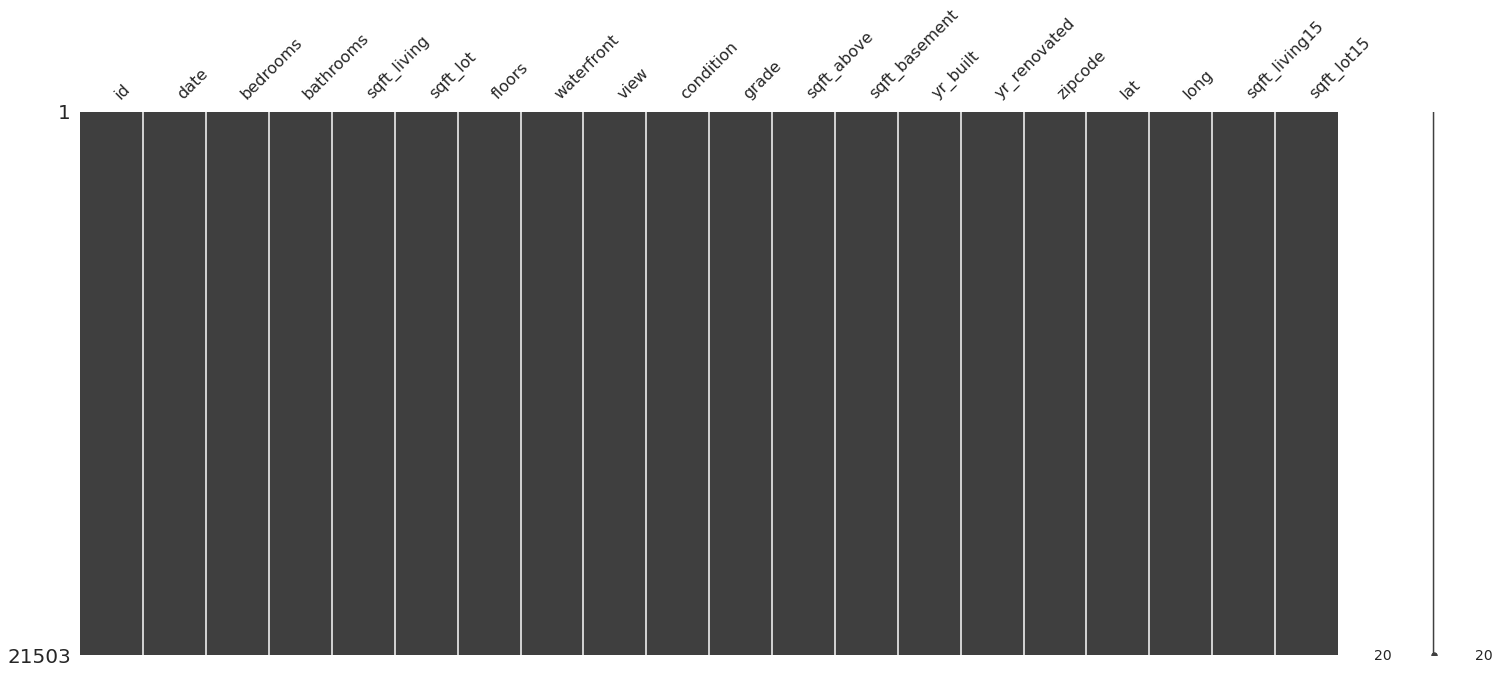

In [12]:
msno.matrix(data)

ÏàòÏπòÎ°ú ÎÇòÌÉÄÎÇ¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [13]:
# col ÏàòÎßåÌÅº forÎ¨∏ÏùÑ ÎèåÎ†§ÏÑú isnullÍ∞í Ï∂úÎ†• / Ï†ÑÏ≤¥ Ïª¨ÎüºÏùÑ ÌïúÎ≤àÏóê Ï∂úÎ†•ÌïòÎäî Ìï®ÏàòÎäî ÏóÜÎÇò?
for col in data.columns:
    print('{} : {}'.format(col, len(data.loc[pd.isnull(data[col]), col].values)))

id : 0
date : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


### id, date Î≥ÄÏàò Ï†ïÎ¶¨
id Î≥ÄÏàòÎäî Î™®Îç∏Ïù¥ ÏßëÍ∞íÏùÑ ÏòàÏ∏°ÌïòÎäîÎç∞ ÎèÑÏõÄÏùÑ Ï£ºÏßÄ ÏïäÏúºÎØÄÎ°ú Ï†úÍ±∞Ìï©ÎãàÎã§.
date Î≥ÄÏàòÎäî ÎÖÑÏõîÏùºÏãúÍ∞ÑÏúºÎ°ú Í∞íÏùÑ Í∞ÄÏßÄÍ≥† ÏûàÎäîÎç∞, ÎÖÑÏõîÎßå Í≥†Î†§ÌïòÎäî Î≤îÏ£ºÌòï Î≥ÄÏàòÎ°ú ÎßåÎì≠ÎãàÎã§.
 * ÎÖÑÏõîÎ°ú Î≤îÏ£ºÌôîÌïòÎ©¥ Í≤ΩÌñ•ÏùÑ Ï∞æÏïÑÎÇ¥ÎäîÎç∞ ÎèÑÏõÄÏùÑ Ï£ºÍ∏∞ÎïåÎ¨∏Ïù¥Í≤†Ï£†..??

In [14]:
sub_id = data['id'][train_len:]
del data['id']
data['date'] = data['date'].apply(lambda x : str(x[:6])).astype(str)
data.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  201410         3       1.00         1180      5650     1.0           0   
1  201502         2       1.00          770     10000     1.0           0   
2  201502         3       2.00         1680      8080     1.0           0   
3  201406         3       2.25         1715      6819     2.0           0   
4  201501         3       1.50         1060      9711     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      6         770              0      1933             0   
2     0          3      8        1680              0      1987             0   
3     0          3      7        1715              0      1995             0   
4     0          3      7        1060              0      1963             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98028  47.7379 -122.233           2720        8062  
2    98074  47.6168 -122.045           1800        7503  
3    98003  47.3097 -122.327           2238        6819  
4    98198  47.4095 -122.315           1650        9711

### Í∞Å Î≥ÄÏàòÎì§Ïùò Î∂ÑÌè¨ ÌôïÏù∏
ÌïúÏ™ΩÏúºÎ°ú Íº¨Ïù∏ Î∂ÑÌè¨Îì§ÏùÑ ÌíÄÏñ¥Ï§çÎãàÎã§.

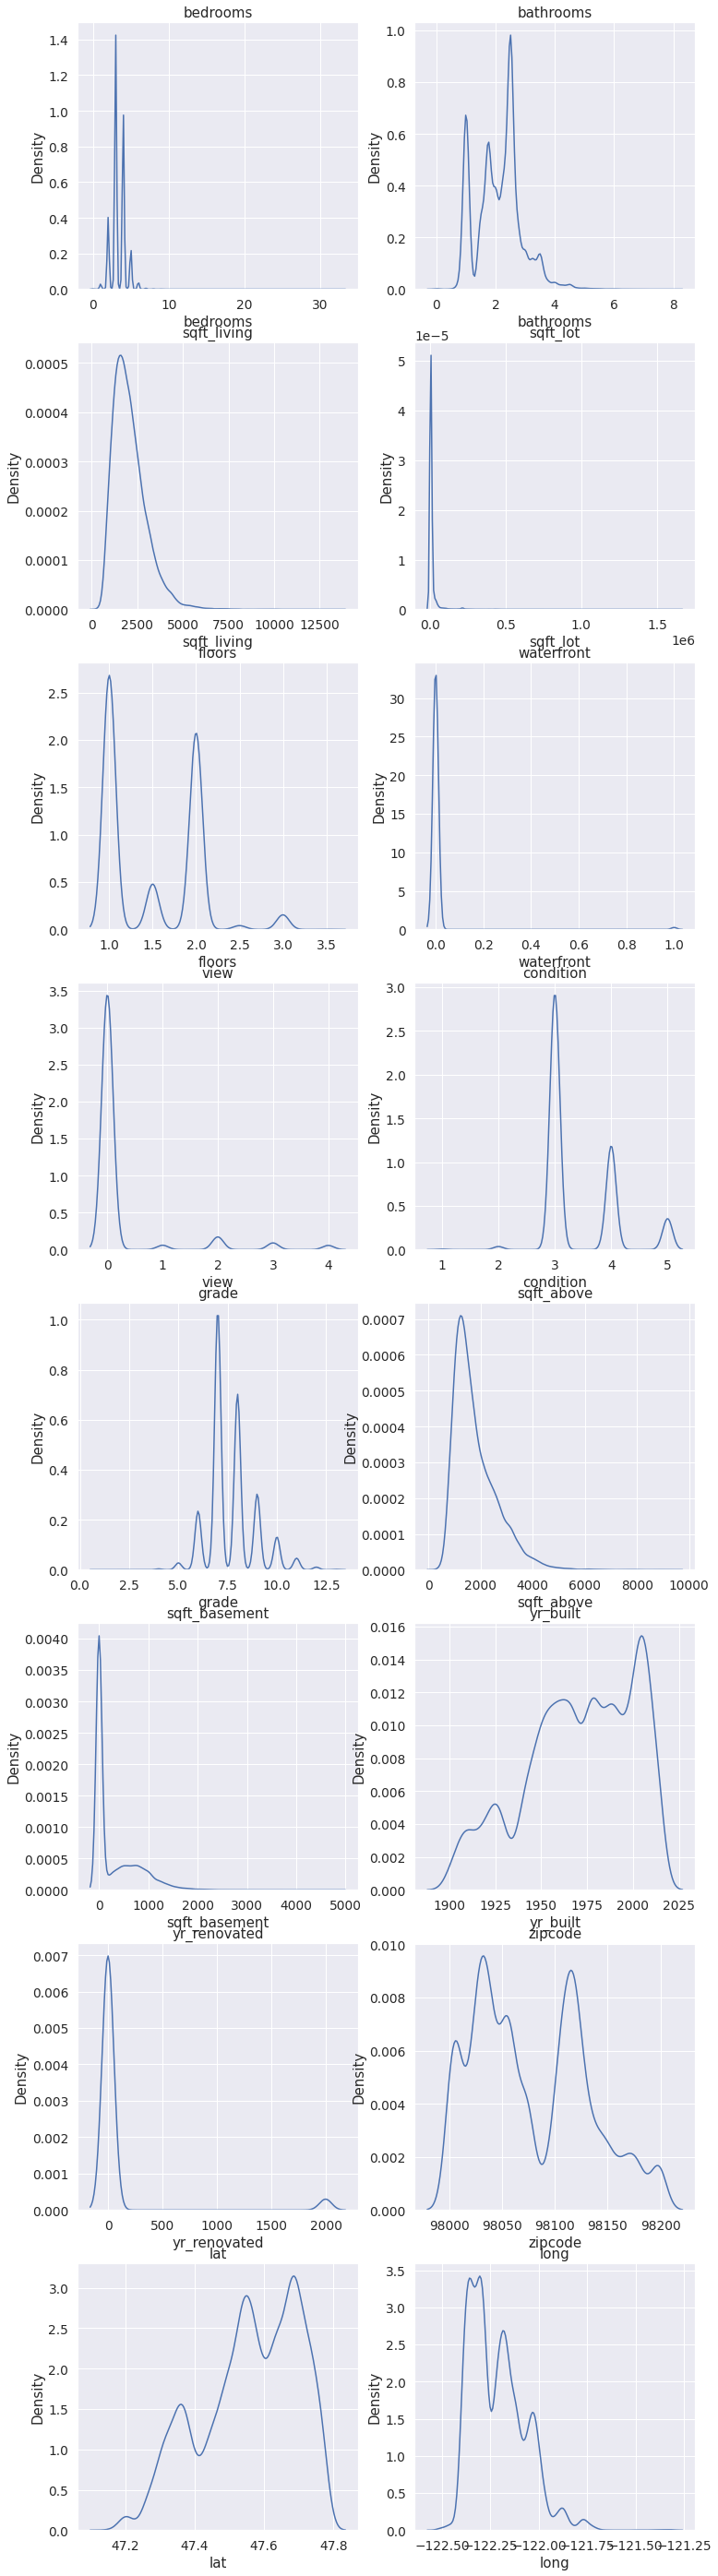

In [15]:
fig, ax = plt.subplots(8, 2, figsize=(12, 50))

# id Î≥ÄÏàò Î∞è datetime(str, count==0Ïù∏ Í≤ΩÏö∞)Îäî Ï†úÏô∏ÌïòÍ≥† Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï©ÎãàÎã§.
count = 1
columns = data.columns
for row in range(8):
    for col in range(2): # 10Ìñâ 2Ïó¥Ïùò subplotÏóê Í∑∏ÎûòÌîÑÎ•º Í∑∏Î¶¨Í∏∞ ÏúÑÌï¥ 2Ï§ë forÎ¨∏ ÏÇ¨Ïö©
        sns.kdeplot(data[columns[count]], ax=ax[row][col]) # Ïù¥ÏÇ∞Îç∞Ïù¥ÌÑ∞Ïùò Í≤ΩÏö∞ÏóêÎèÑ Î∂ÄÎìúÎü¨Ïö¥ Í≥°ÏÑ†ÏúºÎ°ú Í∑∏Î†§Ï§å
        ax[row][col].set_title(columns[count], fontsize=15)
        count+=1
        if count == 19 :
            break

bedrooms, sqft_living, sqft_lot, sqft_above, sqft_basement Î≥ÄÏàòÍ∞Ä ÌïúÏ™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Í≤ΩÌñ•ÏùÑ Î≥¥ÏòÄÏäµÎãàÎã§.<br>
log-scalingÏùÑ ÌÜµÌï¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º Ï†ïÍ∑úÎ∂ÑÌè¨Ïóê Í∞ÄÍπùÍ≤å ÎßåÎì§Ïñ¥ Î≥¥Í≤†ÏäµÎãàÎã§.

In [16]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

for c in skew_columns: #ÌëúÏ§ÄÌôî
    data[c] = np.log1p(data[c].values) # ÏûÖÎ†• Î∞∞Ïó¥Ïùò Í∞Å ÏöîÏÜåÏóê ÎåÄÌï¥ ÏûêÏó∞Î°úÍ∑∏ log(1 + x)ÏùÑ Î∞òÌôòÌï¥ Ï£ºÎäî Ìï®Ïàò

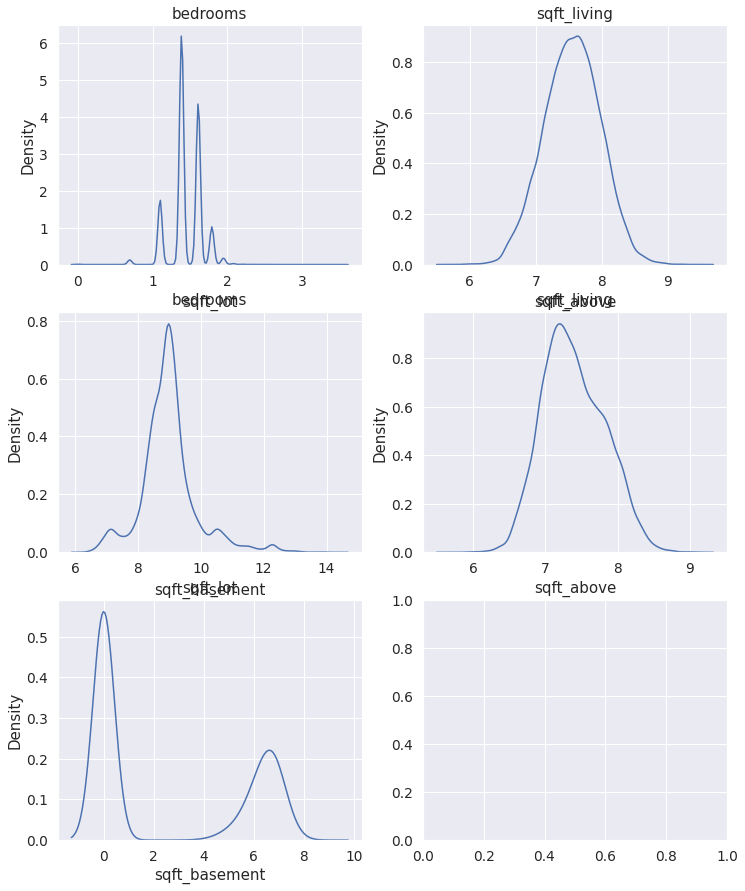

In [17]:
fig, ax = plt.subplots(3, 2, figsize=(12, 15))

count = 0
for row in range(3):
    for col in range(2):
        if count == 5:
            break
        sns.kdeplot(data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count+=1



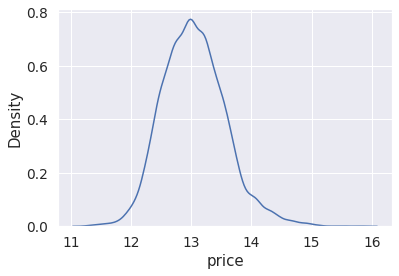

In [18]:
# Í∞ÄÍ≤©ÏóêÎèÑ logÎ•º Ï∑®Ìï¥Ï§å
y_log_transformation = np.log1p(y)

sns.kdeplot(y_log_transformation)
plt.show()

Ï†ïÍ∑úÌôîÎêú Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [19]:
# Ï†ÑÏ≤òÎ¶¨ ÎÅùÎÇú Îç∞Ïù¥ÌÑ∞ Ìï©ÏπòÍ∏∞
sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

## 3. Î™®Îç∏ÎßÅ
### Average Blending
Ïó¨Îü¨Í∞ÄÏßÄ Î™®Îç∏Ïùò Í≤∞Í≥ºÎ•º ÏÇ∞Ïà† ÌèâÍ∑†ÏùÑ ÌÜµÌï¥ *Blending Î™®Îç∏ÏùÑ ÎßåÎì§Í≤†ÏäµÎãàÎã§.
 * *Ïó¨Îü¨ Í∞ÄÏßÄ Î™®Îç∏ÏùÑ Ìï®Íªò ÏÇ¨Ïö©Ìï¥ÏÑú Í≤∞Í≥ºÎ•º ÏÑûÎäî, Î∏îÎ†åÎî©(blending) Í∏∞Î≤ï ÌôúÏö©( = ÏïôÏÉÅÎ∏îÍ∏∞Î≤ï)

In [20]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

# Î™®Îç∏ÏùÑ ÏÑ†Ïñ∏ÌïòÍ≥† ÎîïÏÖîÎÑàÎ¶¨Ïóê Ï†ÄÏû•
models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

### Cross Validation
ÍµêÏ∞® Í≤ÄÏ¶ùÏùÑ ÌÜµÌï¥ Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ Í∞ÑÎã®Ìûà ÌèâÍ∞ÄÌïòÍ≤†ÏäµÎãàÎã§.

In [21]:
def get_cv_score(models):
    kfold = KFold(n_splits=5, random_state=2019).get_n_splits(x.values)
    for m in models:
        print("Model {} CV score : {:.4f}".format(m['name'], np.mean(cross_val_score(m['model'], x.values, y)), 
                                             kf=kfold))

In [22]:
get_cv_score(models)

Model GradientBoosting CV score : 0.8597
Model XGBoost CV score : 0.8861
Model LightGBM CV score : 0.8819


### Make Submission

ÌöåÍ∑Ä Î™®Îç∏Ïùò Í≤ΩÏö∞ÏóêÎäî cross_val_score Ìï®ÏàòÍ∞Ä R<sup>2</sup>Î•º Î∞òÌôòÌï©ÎãàÎã§.<br>
R<sup>2</sup> Í∞íÏù¥ 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Ïûò ÌëúÌòÑÌï®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§. 3Í∞ú Ìä∏Î¶¨ Î™®Îç∏Ïù¥ ÏÉÅÎãπÌûà ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ Í¥úÏ∞ÆÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïó¨Ï£ºÍ≥† ÏûàÏäµÎãàÎã§.<br> ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú 3Í∞ú Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Í≥†, Average BlendingÏùÑ ÌÜµÌï¥ Ï†úÏ∂ú Í≤∞Í≥ºÎ•º ÎßåÎì§Í≤†ÏäµÎãàÎã§.

 * AgeragingBlending() Ìï®ÏàòÎäî models ÎîïÏÖîÎÑàÎ¶¨ ÏïàÏóê ÏûàÎäî Î™®Îç∏ÏùÑ Î™®Îëê xÏôÄ yÎ°ú ÌïôÏäµÏãúÌÇ® Îí§ predictionsÏóê Í∑∏ ÏòàÏ∏° Í≤∞Í¥èÍ∞íÏùÑ Î™®ÏïÑÏÑú ÌèâÍ∑†Ìïú Í∞íÏùÑ Î∞òÌôò

In [23]:
# Ïó¨Îü¨ Î™®Îç∏ÏùÑ ÏûÖÎ†•ÌïòÎ©¥ Í∞Å Î™®Îç∏Ïóê ÎåÄÌïú ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÌèâÍ∑† ÎÇ¥Ïñ¥ Ï£ºÎäî Ìï®Ïàò
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y) # pandasÎèÑ ÎîïÏÖîÎÑàÎ¶¨Ï≤òÎüº keys, valuesÎ°ú Ï†ëÍ∑ºÍ∞ÄÎä•(Í¥ÑÌò∏Îäî ÏÉùÎûµÌï¥ÏïºÌïòÎäîÎìØ)
    
    predictions = np.column_stack([ # np.column_stack([a, b])ÏùÄ Îëê 1Ï∞®ÏõêÎ∞∞Ïó¥ a, bÎ•º columnÍ∏∞Ï§ÄÏúºÎ°ú Î∂ôÏó¨Ï§å
        m['model'].predict(sub_x.values) for m in models # sub_x.values(test data)Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏°
    ])
    return np.mean(predictions, axis=1)

In [24]:
y_pred = AveragingBlending(models, x, y, sub)

In [25]:
# Ï†úÏ∂ú ÌòïÏãùÏóê ÎßûÍ≤å Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
sub = pd.DataFrame(data={'id':sub_id,'price':y_pred})

In [26]:
sub.to_csv('submission.csv', index=False)

In [27]:
# # ÏúÑÏôÄ ÎèôÏùºÌïú ÏΩîÎìú, Î≥¥Îã§ ÌíÄÏñ¥ÏÑú ÏÑ§Î™Ö
# my_submission_path = join(data_dir, 'submission.csv')
# result.to_csv(my_submission_path, index=False)

# print(my_submission_path)

### ÎÇ¥ ÏûÖÎßõÎåÄÎ°ú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑÌïòÍ∏∞

#### ÏµúÏ†ÅÏùò Î™®Îç∏ÏùÑ Ï∞æÏïÑÏÑú, ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù
 * ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º ÌäúÎãùÌï¥Î≥¥Î©¥ÏÑú Î™®Îç∏ ÏµúÏ†ÅÌôî

### Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è preprocessing

In [28]:
data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)
train = train.drop('sqft_living15', axis = 1)
test = test.drop('sqft_living15', axis = 1)

print('Ïñçüí¢')

Ïñçüí¢


In [29]:
train.head()

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0  20141013T000000  221900.0         3       1.00         1180      5650   
1   1  20150225T000000  180000.0         2       1.00          770     10000   
2   2  20150218T000000  510000.0         3       2.00         1680      8080   
3   3  20140627T000000  257500.0         3       2.25         1715      6819   
4   4  20150115T000000  291850.0         3       1.50         1060      9711   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0     1.0           0     0          3      7        1180              0   
1     1.0           0     0          3      6         770              0   
2     1.0           0     0          3      8        1680              0   
3     2.0           0     0          3      7        1715              0   
4     1.0           0     0          3      7        1060              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_lot15  
0      1955             0    98178  47.5112 -122.257        5650  
1      1933             0    98028  47.7379 -122.233        8062  
2      1987             0    98074  47.6168 -122.045        7503  
3      1995             0    98003  47.3097 -122.327        6819  
4      1963             0    98198  47.4095 -122.315        9711

In [30]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int) # intÌòïÏúºÎ°ú Î≥ÄÌôòÌïòÏó¨ dateÏª¨ÎüºÍπåÏßÄ Î∂ÑÏÑùÏóê ÌôúÏö©
train.head()

id    date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  201410  221900.0         3       1.00         1180      5650     1.0   
1   1  201502  180000.0         2       1.00          770     10000     1.0   
2   2  201502  510000.0         3       2.00         1680      8080     1.0   
3   3  201406  257500.0         3       2.25         1715      6819     2.0   
4   4  201501  291850.0         3       1.50         1060      9711     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      6         770              0      1933   
2           0     0          3      8        1680              0      1987   
3           0     0          3      7        1715              0      1995   
4           0     0          3      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_lot15  
0             0    98178  47.5112 -122.257        5650  
1             0    98028  47.7379 -122.233        8062  
2             0    98074  47.6168 -122.045        7503  
3             0    98003  47.3097 -122.327        6819  
4             0    98198  47.4095 -122.315        9711

In [31]:
# Î†àÏù¥Î∏î Î∂ÑÎ¶¨
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_lot15'],
      dtype='object')


In [32]:
# id Ï†úÍ±∞
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_lot15'],
      dtype='object')


In [33]:
# dateÎ≥ÄÏàòÏùò ÎÖÑ, ÏõîÍπåÏßÄ ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ intÌÉÄÏûÖÏúºÎ°ú Î≥ÄÌôò
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)

del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_lot15'],
      dtype='object')


In [34]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

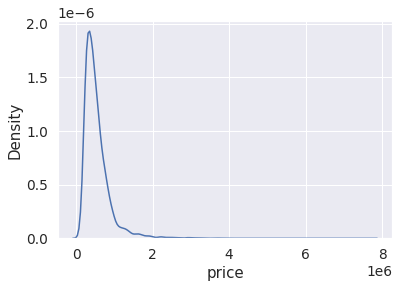

In [35]:
# ÌÉÄÍ≤üÎ≥ÄÏàò Î∂ÑÌè¨ÌôïÏù∏
sns.kdeplot(y)
plt.show()

In [36]:
# yÎäî np.log1p() Ìï®ÏàòÎ•º ÌÜµÌï¥ Î°úÍ∑∏ Î≥ÄÌôòÏùÑ Ìï¥Ï£ºÍ≥†, Î™®Îç∏Ïù¥ Í∞íÏùÑ ÏòàÏ∏°Ìïú ÌõÑÏóê Îã§Ïãú np.exp1m()ÏùÑ ÌôúÏö©ÌïòÏó¨ Î≥µÏõê
# np.exp1m()ÏùÄ np.log1p()Í≥ºÎäî Î∞òÎåÄÎ°ú Í∞Å ÏõêÏÜå xÎßàÎã§ exp(x)-1Ïùò Í∞íÏùÑ Î∞òÌôò
y = np.log1p(y)
y

0        12.309987
1        12.100718
2        13.142168
3        12.458779
4        12.583999
           ...    
15030    13.322338
15031    13.822984
15032    12.793862
15033    12.899222
15034    12.691584
Name: price, Length: 15035, dtype: float64

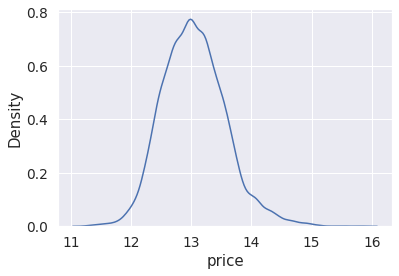

In [37]:
sns.kdeplot(y)
plt.show()

In [38]:
# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ ÏûêÎ£åÌòï ÌôïÏù∏
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int64  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_lot15     15035 non-null  int64  
dtypes: flo

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


* ÎåÄÌöåÏóêÏÑú Ï†êÏàòÎ•º Îß§Í∏∞Îäî Í≤ÉÍ≥º Í∞ôÏùÄ ÌèâÍ∞Ä Ï≤ôÎèÑÏù∏ RMSEÎ•º Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌï¥ Îã§ÏùåÍ≥º Í∞ôÏùÄ Ìï®ÏàòÎ•º Íµ¨ÌòÑ
* RMSE = expÎ°ú Îã§Ïãú Î≥ÄÌôòÌï¥ÏÑú mean_squared_errorÎ•º Í≥ÑÏÇ∞Ìïú Í∞íÏóê np.sqrtÎ•º Ï∑®Ìï®
*  **y_testÎÇò y_predÎäî ÏúÑÏóêÏÑú np.log1p()Î°ú Î≥ÄÌôòÏù¥ Îêú Í∞íÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏõêÎûò Îç∞Ïù¥ÌÑ∞Ïùò Îã®ÏúÑÏóê ÎßûÍ≤å ÎêòÎèåÎ¶¨Í∏∞ ÏúÑÌï¥ np.expm1()ÏùÑ Ï∂îÍ∞ÄÌï¥Ïïº Ìï®**

In [40]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

In [41]:
# Î™®Îç∏ import
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [42]:
# random_stateÎäî Î™®Îç∏Ï¥àÍ∏∞ÌôîÎÇò Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±Ïóê ÏÇ¨Ïö©ÎêòÎäî ÎûúÎç§ ÏãúÎìúÍ∞íÏûÖÎãàÎã§. 
#random_state=None    # Ïù¥Í≤å Ï¥àÍ∏∞Í∞íÏûÖÎãàÎã§. ÏïÑÎ¨¥Í≤ÉÎèÑ ÏßÄÏ†ïÌïòÏßÄ ÏïäÍ≥† NoneÏùÑ ÎÑòÍ≤®Ï£ºÎ©¥ Î™®Îç∏ ÎÇ¥Î∂ÄÏóêÏÑú ÏûÑÏùòÎ°ú ÏÑ†ÌÉùÌï©ÎãàÎã§.  
random_state=2020        # ÌïòÏßÄÎßå Ïö∞Î¶¨Îäî Ïù¥Î†áÍ≤å Í≥†Ï†ïÍ∞íÏùÑ ÏÑ∏ÌåÖÌï¥ ÎëêÍ≤†ÏäµÎãàÎã§. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

In [43]:
gboost.__class__.__name__
type(gboost.__class__.__name__)

str

In [44]:
xgboost.__class__.__name__

'XGBRegressor'

In [45]:
lightgbm.__class__.__name__

'LGBMRegressor'

In [46]:
rdforest.__class__.__name__

'RandomForestRegressor'

### Ï†ÄÏû•Ìïú Î™®Îç∏ÏùÑ Ïù¥Î¶ÑÏúºÎ°ú Ï†ëÍ∑ºÌïòÏó¨ Ï∂îÏ∂ú Î∞è ÏÇ¨Ïö©

In [47]:
df = {}

for model in models:
    # Î™®Îç∏ Ïù¥Î¶Ñ ÌöçÎìù
    model_name = model.__class__.__name__

    # train, test Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨ - Ïó¨Í∏∞ÏóêÎèÑ random_stateÎ•º Í≥†Ï†ïÌï©ÎãàÎã§. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    # Î™®Îç∏ ÌïôÏäµ
    model.fit(X_train, y_train)
    
    # ÏòàÏ∏°
    y_pred = model.predict(X_test)

    # ÏòàÏ∏° Í≤∞Í≥ºÏùò rmseÍ∞í Ï†ÄÏû•
    df[model_name] = rmse(y_test, y_pred)
    
    # data frameÏóê Ï†ÄÏû•
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
#print(df.shape)
print(score_df.shape)
print(df)

(4, 1)
{'GradientBoostingRegressor': 131744.12963449786, 'XGBRegressor': 111544.14598658329, 'LGBMRegressor': 110212.60755603209, 'RandomForestRegressor': 125541.58519657851}


### ÏúÑÏùò ÎÇ¥Ïö©ÏùÑ Ìï®ÏàòÎ°ú ÎßåÎì§Ïñ¥ÏÑú ÌôúÏö©

In [48]:
def get_scores(models, train, y):
    df = {}
    for model in models:
        model_name = model.__class__.__name__
        x_train, x_test, y_train, y_test = train_test_split(train, y, random_state = random_state, test_size = 0.2)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index = ['RMSE']).T.sort_values('RMSE', ascending = False)
    return score_df

get_scores(models, train, y)

RMSE
GradientBoostingRegressor  131744.129634
RandomForestRegressor      125541.585197
XGBRegressor               111544.145987
LGBMRegressor              110212.607556

# (3) ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùò ÏµúÍ∞ïÏûê, Í∑∏Î¶¨Îìú ÌÉêÏÉâ

In [49]:
from sklearn.model_selection import GridSearchCV

### GridSearchCVÏóê ÏûÖÎ†•ÎêòÎäî Ïù∏Ïûê

* param_grid : ÌÉêÏÉâÌï† ÌååÎùºÎØ∏ÌÑ∞Ïùò Ï¢ÖÎ•ò (ÎîïÏÖîÎÑàÎ¶¨Î°ú ÏûÖÎ†•)
  * Ïó¨Í∏∞ ÏûÖÎ†•Ìïú ÌååÎùºÎØ∏ÌÑ∞Ïùò Í≤ΩÏö∞Ïùò ÏàòÎ•º Î™®Îëê Íµ¨Ìï®
* scoring : Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï† ÏßÄÌëú
* cv : cross validationÏùÑ ÏàòÌñâÌïòÍ∏∞ ÏúÑÌï¥ train Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎÇòÎàÑÎäî Ï°∞Í∞ÅÏùò Í∞úÏàò
* verbose : Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÏßÑÌñâÌïòÎ©¥ÏÑú ÏßÑÌñâ Í≥ºÏ†ïÏùÑ Ï∂úÎ†•Ìï¥ÏÑú Î≥¥Ïó¨Ï§Ñ Î©îÏÑ∏ÏßÄÏùò Ïñë
  * Ïà´ÏûêÍ∞Ä ÌÅ¥ÏàòÎ°ù Îçî ÎßéÏùÄ Î©îÏÑ∏ÏßÄÎ•º Ï∂úÎ†•
* n_jobs : Í∑∏Î¶¨Îìú ÌÉêÏÉâÏùÑ ÏßÑÌñâÌïòÎ©¥ÏÑú ÏÇ¨Ïö©Ìï† CPUÏùò Í∞úÏàò

### ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Ï†ï

In [50]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV Î™®Îç∏Î°ú Ï¥àÍ∏∞Ìôî
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)

    # ÌõàÎ†®
    grid_model.fit(train, y)

    # Í≤∞Í≥º Ï†ÄÏû•
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú ÎßåÎì§Ïñ¥Ï§å
    results = pd.DataFrame(params)
    results['score'] = score

    # RMLSEÍ∞í Ï†ÄÏû•(scoreÍ∞í(1/n*error^2)Ïóê -Î•º Ï∑®Ìï¥Ï£ºÍ≥† Î£®Ìä∏Î•º ÏîåÏõÄ
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

### (4) Ï†úÏ∂úÌïòÎäî Í≤ÉÎèÑ, Îπ†Î•¥Í≥† ÍπîÎÅîÌïòÍ≤å!

Í∑∏Î¶¨Îìú ÌÉêÏÉâ

In [54]:
param_grid = {
    'n_estimators': [500, 600, 700],
    'max_depth': [60, 80, 200],
    'learning_rate': [0.1],
    'num_leaves': [4, 8, 16],
    #'boosting': ['dart'],
    'num_iterations': [1200, 1300, 1500]
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    1.7s remaining:    2.5s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    1.9s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    1.9s finished


learning_rate  max_depth  n_estimators  num_iterations  num_leaves  \
0            0.1        200           700            1500           8   

      score     RMSLE  
0 -0.025903  0.160945

### ÏúÑ Í≤∞Í≥º Í∞ÄÏû• Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïù∏ ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î°ú Î™®Îç∏ ÌïôÏäµ

 * LGBMÏùÄ Ìä∏Î¶¨ Í∏∞Î∞òÏùò ÌïôÏäµÏïåÍ≥†Î¶¨Ï¶òÏúºÎ°ú leaf-wise-tree-growth Î∞©ÏãùÏóê ÏÜçÌï®
 * Ïù¥Îäî level-wise Î∞©ÏãùÏóê ÎπÑÌï¥ ÎÇÆÏùÄ lossÎ•º Î≥¥Ïù¥Îäî Í≤ΩÌñ•Ïù¥ ÏûàÏùå
 * Îç∞Ïù¥ÌÑ∞ ÏàòÍ∞Ä Î∂ÄÏ°±Ìï† Îïå Í≥ºÏ†ÅÌï©Ïùò Ïö∞Î†§Í∞Ä ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê max-depthÎ•º Ï°∞Ï†àÌï† ÌïÑÏöîÍ∞Ä ÏûàÏùå
 
 * Ïû•Ï†ê : Îπ†Î•¥Îã§, Î©îÎ™®Î¶¨Î•º Ï†ÅÍ≤å ÏÇ¨Ïö©ÌïúÎã§, gpuÏùò ÏÇ¨Ïö©Ïù¥ Í∞ÄÎä•ÌïòÎã§, Ï†ïÌôïÎèÑÍ∞Ä ÎÜíÎã§
 * Îã®Ï†ê : over fittingÏùò ÏúÑÌóòÎïåÎ¨∏Ïóê Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÍ∞Ä ÎßéÏùÑ Îïå Ïú†Î¶¨
   * Í≤ΩÌóòÏ†ÅÏúºÎ°ú 10,000Í∞ú Ïù¥ÏÉÅÏùº Îïå Ï∂îÏ≤ú

In [52]:
"""
ÏïÑÎûòÏùò Í≥ºÏ†ïÏùÑ ÏàòÌñâÌïòÎäî `save_submission(model, train, y, test, model_name, rmsle)` Ìï®ÏàòÎ•º Íµ¨ÌòÑÌï¥ Ï£ºÏÑ∏Ïöî.
1. Î™®Îç∏ÏùÑ `train`, `y`Î°ú ÌïôÏäµÏãúÌÇµÎãàÎã§.
2. `test`Ïóê ÎåÄÌï¥ ÏòàÏ∏°Ìï©ÎãàÎã§.
3. ÏòàÏ∏°Í∞íÏùÑ `np.expm1`ÏúºÎ°ú Î≥ÄÌôòÌïòÍ≥†, `submission_model_name_RMSLE_100000.csv` ÌòïÌÉúÏùò `csv` ÌååÏùºÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
"""
#model ÏÑ§Ï†ï
model = LGBMRegressor(max_depth=200, n_estimators=700, learning_rate=0.10, num_leaves = 8, num_iterations = 1500, random_state=random_state)
# ÏΩîÎìú ÏûëÏÑ±
def save_submission(model, train, y, test, model_name, rmsle):
    
    #Î™®Îç∏ ÌõàÎ†®
    model.fit(train, y)
    # testÎ•º ÏÇ¨Ïö©Ìï¥ ÏòàÏ∏°
    prediction = model.predict(test)
    # price Î≥µÍµ¨
    prediction = np.expm1(prediction)
    # Ï†úÏ∂ú ÌååÏùº Ï†ÄÏû•, ÌååÏùºÎ™ÖÏóê Î™®Îç∏Î™ÖÍ≥º RMSLEÍ∞í ÌëúÍ∏∞
    data_dir = os.getenv("HOME")+"/aiffel/kaggle_kakr_housing/data"
    submission_path = join(data_dir, "sample_submission.csv")
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)

In [53]:
save_submission(model, train, y, test, 'lgbm', rmsle='120595.692899')

# 9-13. ÌîÑÎ°úÏ†ùÌä∏ : This is your playground! LeaderboardÎ•º Ï†ïÎ≥µÌï¥ Ï£ºÏÑ∏Ïöî!

ÌäúÎãùÌï¥Î≥º Ïàò ÏûàÎäî Î™®Îç∏ ÌÅ¥ÎûòÏä§ Ïù∏Ïûê
* max_depth : ÏùòÏÇ¨ Í≤∞Ï†ï ÎÇòÎ¨¥Ïùò ÍπäÏù¥, Ï†ïÏàò ÏÇ¨Ïö©
* learning_rate : Ìïú Ïä§ÌÖùÏóê Ïù¥ÎèôÌïòÎäî ÏñëÏùÑ Í≤∞Ï†ïÌïòÎäî ÌååÎùºÎØ∏ÌÑ∞, Î≥¥ÌÜµ 0.0001~0.1 ÏÇ¨Ïù¥Ïùò Ïã§Ïàò ÏÇ¨Ïö©
* n_estimators : ÏÇ¨Ïö©ÌïòÎäî Í∞úÎ≥Ñ Î™®Îç∏Ïùò Í∞úÏàò, Î≥¥ÌÜµ 50~100 Ïù¥ÏÉÅÏùò Ï†ïÏàò ÏÇ¨Ïö©
* num_leaves : ÌïòÎÇòÏùò LightGBM Ìä∏Î¶¨Í∞Ä Í∞ÄÏßà Ïàò ÏûàÎäî ÏµúÎåÄ ÏûéÏùò Ïàò
* boosting_type : Î∂ÄÏä§ÌåÖ Î∞©Ïãù, gbdt, rf Îì±Ïùò Î¨∏ÏûêÏó¥ ÏûÖÎ†•


## ÌîÑÎ°úÏ†ùÌä∏ Î£®Î∏åÎ¶≠

### Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨, Î™®Îç∏ÌïôÏäµ, ÏòàÏ∏°Ïùò Ï†ÑÏ≤¥ Í≥ºÏ†ïÏùÑ Í±∞Ï≥ê Ï∫êÍ∏Ä submissionÍπåÏßÄ Ï†ÑÍ≥ºÏ†ïÏù¥ ÏÑ±Í≥µÏ†ÅÏúºÎ°ú ÏßÑÌñâÎêòÏóàÎäîÍ∞Ä?
* Ï£ºÏñ¥ÏßÑ ÎÖ∏ÎìúÎ•º ÌôúÏö©ÌïòÏó¨ Îç∞Ïù¥ÌÑ∞ ÌÉêÏÉâ Î∞è Ï†ÑÏ≤òÎ¶¨, Î™®Îç∏ÎßÅ, ÌïôÏäµ Î∞è ÏòàÏ∏° Îì± ÏùºÎ†®Ïùò Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌïòÏòÄÏäµÎãàÎã§.

### Ï†úÏ∂úÎêú ÎÖ∏Ìä∏Î∂ÅÏù¥ Ï∫êÍ∏Ä Ïª§ÎÑêÎ°ú ÏÇ¨Ïö©Îê† Ïàò ÏûàÏùÑ ÎßåÌÅº Ï†ÑÏ≤òÎ¶¨, ÌïôÏäµ, ÏµúÏ†ÅÌôî ÏßÑÌñâ Í≥ºÏ†ïÏù¥ Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú Í∏∞Ïà†ÎêòÏóàÎäîÍ∞Ä?
* ÏùºÎ†®Ïùò Í≥ºÏ†ïÏùÑ Ï∞®Î°ÄÎåÄÎ°ú ÏßÑÌñâÌïòÏòÄÏúºÎ©∞, Ïö∞ÏÑ† 3Í∞úÏùò Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ® ÏïôÏÉÅÎ∏î Î™®ÌòïÏùÑ ÏãúÎèÑÌïòÍ≥†, Ïù¥ÌõÑ LGBMÏùÑ ÌÜµÌïú ÌïòÏù¥ÌÑ∞ ÌååÎùºÎØ∏ÌÑ∞ ÏµúÏ†ÅÌôîÎ•º ÏßÑÌñâÌïòÏòÄÏäµÎãàÎã§. 

### Îã§ÏñëÌïú ÌîºÏ≤ò ÏóîÏßÄÎãàÏñ¥ÎßÅÍ≥º ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãù Îì±Ïùò ÏµúÏ†ÅÌôî Í∏∞Î≤ïÏùÑ ÌÜµÌï¥ Ï∫êÍ∏Ä Î¶¨ÎçîÎ≥¥ÎìúÏùò Private score Í∏∞Ï§Ä 110000 Ïù¥ÌïòÏùò Ï†êÏàòÎ•º ÏñªÏóàÎäîÍ∞Ä?
* Îã§ÏñëÌïú ÏãúÎèÑÎ•º ÌÜµÌïú Í∏∞Ï§ÄÏπò Ïù¥ÏÉÅÏùò Ïä§ÏΩîÏñ¥Î•º Îã¨ÏÑ±ÌïòÏòÄÏäµÎãàÎã§.

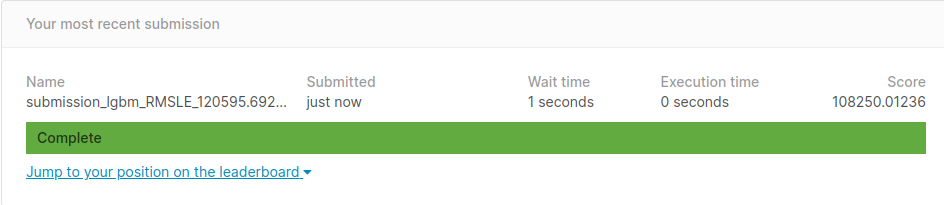

# Ï†êÏàòÍ∏∞Î°ù

#### ÏïÑÎûòÏùò ÏãúÎèÑ Ïù¥Ïô∏ÏóêÎèÑ Îã§ÏñëÌïú ÏãúÎèÑÎ•º Ìï®

ÎÖ∏ÎìúÏóêÏÑú Ï£ºÏñ¥ÏßÑ estimators, depth, learning_rateÎ•º Î∞îÍøîÍ∞ÄÎ©∞ Ìïú Îã§ÏñëÌïú ÏãúÎèÑÎäî Î≥ÑÎã§Î•∏ ÏàòÌôïÏù¥ ÏóÜÏóàÏùå
ÌÉêÏÉâÌïú ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞(Ïù¥Ïô∏ÏóêÎèÑ ÎßéÏùÄ Ïã§ÌóòÏùÑ Ìï®)

param_grid = 
* 'n_estimators': [50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 1000],

* 'max_depth': [1, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500],    
    
* 'learning_rate': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.005, 0.01, 0.05, 0.1, 0.5]}

  * 0.164399 = 115688.17397

  * 0.161828 = 115201.78826

  * 129645.49035

  * 0.161079 = 115936.95282
  
  * 0.160684 = 116199.45015

## ÌöåÍ≥†

Ï≤òÏùåÏóî Îã®ÏàúÌûà ÌöåÍ∑ÄÎ∂ÑÏÑùÏóêÏÑú ÏÇ¨Ïö©ÌïòÎìØ Ïó¨Îü¨ Î≥ÄÏàòÎì§ÏùÑ ÎπÑÍµêÌïòÍ≥†, ÏòÅÌñ•Ïùò Ï†ïÎèÑÎ•º ÌååÏïÖÌï¥ÏÑú ÌÉÄÍ≤üÎ≥ÄÏàòÏóê ÎßéÏùÄ ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Î≥ÄÏàòÎì§ÏùÑ ÏúÑÏ£ºÎ°ú ÎèåÎ¶¨Î©¥ ÎêòÍ≤†Í±∞Îãà ÏÉùÍ∞ÅÌïòÍ≥† Ïó¨Ïú†Î•º Î∂ÄÎ†∏ÏäµÎãàÎã§. Î™®Îç∏Ïùò Íµ¨ÏÑ±ÎèÑ Ïù¥Î≤à ÎÖ∏ÎìúÎäî Îî∞ÎùºÎßå ÌïòÎ©¥ Îê†Í≤É Í∞ôÏïòÏßÄÎßå ÏÉùÍ∞ÅÎ≥¥Îã§ ÎßéÏùÄ ÏãúÍ∞ÑÏù¥ Í±∏Î†∏ÏäµÎãàÎã§.
Í∞ÄÏû• ÌÅ∞ Î¨∏Ï†úÎäî Î≥ÄÏàòÏÑ†ÌÉùÏóê ÎåÄÌïú Î™®ÎìàÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäîÎã§Îäî Í≤ÉÏù¥ÏóàÏäµÎãàÎã§!(Ïù¥Í±∏ Íµ¨ÌòÑÌï¥Î≥¥Í≤†Îã§Í≥† ÏãúÍ∞ÑÏ¢Ä Ïû°ÏïÑÎ®πÏóàÏäµÎãàÎã§..„Ö†)

Î™®Îç∏Ïóê ÎåÄÌïú Ïù¥Ìï¥ÎèÑ Î∂ÄÏ°±ÌñàÍ≥†, ÎÖ∏ÎìúÎäî Îã®ÏàúÌûà Îî∞Îùº ÏòÆÍ∏∞Í∏∞Îßå ÌñàÍ∏∞ÎïåÎ¨∏Ïóê ÏΩîÎìúÎ•º Î∞îÍøîÎ≥¥Í∏∞Ï°∞Ï∞® Ïñ¥Î†§Ïõ†ÏäµÎãàÎã§. Í∑∏ÎûòÏÑú ÏÉùÍ∞ÅÌïúÍ≤ÉÎ≥¥Îã§ Ï†êÏàòÍ∞Ä ÎÇòÏò§ÏßÄ ÏïäÏïòÏùÑÎïåÎ∂ÄÌÑ∞ Ï≤òÏùåÎ∂ÄÌÑ∞ Îã§Ïãú ÏùΩÏñ¥Î≥¥Í≥† Î≥ÄÌôîÎ•º ÏãúÎèÑÌñàÏäµÎãàÎã§. LGBMÎ™®Îç∏ÏùÑ Î∞îÌÉïÏúºÎ°ú Í∏∞Ï°¥ ÎÖ∏ÎìúÏóêÏÑú Ï†úÏãúÌïú 3Í∞ÄÏßÄ ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º ÏàòÏ†ïÌïòÏòÄÏäµÎãàÎã§. Í∑∏Îü¨ÎÇò ÏàòÏ∞®Î°Ä ÏãúÎèÑÌïú Í≤∞Í≥ºÍ∞Ä 2*2Ïùò Îã®ÏàúÌïú grid searchÎ≥¥Îã§ Ï†êÏàòÍ∞Ä ÎÇÆÏïòÏäµÎãàÎã§. Í∏∞Î°ùÌïú Ï†êÏàò Ïù¥Ïô∏ÏóêÎèÑ ÏàòÎßéÏùÄ ÏãúÎèÑÎ•º ÌñàÏßÄÎßå ÏÑ±Îä•Ïùò Ìñ•ÏÉÅÏù¥ ÏóÜÏóàÏäµÎãàÎã§. Í∑∏Îü¨Îã§ Îã§Î•∏ ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Î•º Í≤ÄÏÉâÌï¥ÏÑú Ï∂îÍ∞ÄÌï¥Î≥∏ Í≤∞Í≥º, Í∏∞Ï§Ä Ï†êÏàòÎ≥¥Îã§ ÎÜíÏùÄ ÏÑ±Îä•ÏùÑ ÎÇº Ïàò ÏûàÏóàÏäµÎãàÎã§.

Ïó¨Îü¨Í∞ÄÏßÄ ÌïòÏù¥Ìçº ÌååÎùºÎØ∏ÌÑ∞Í∞Ä ÏûàÏßÄÎßå, Í∑∏Ï§ëÏóêÏÑúÎèÑ ÏÑ±Îä•Ïóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Ïö∞ÏÑ†ÏàúÏúÑÍ∞Ä ÏûàÎã§Îäî Í≤ÉÏùÑ ÏïåÍ≤å ÎêòÏóàÏäµÎãàÎã§. ÏòàÎ•ºÎì§Ïñ¥ learning_rate, num_iterations, max_depth, boostingÎì±Ïù¥ ÏÑ±Îä•ÏùÑ Í∞úÏÑ†ÌïòÎäîÎç∞ Îã§Î•∏ ÌååÎùºÎØ∏ÌÑ∞Ïóê ÎπÑÌï¥ ÏòÅÌñ•ÏùÑ ÎßéÏù¥ Ï§ÄÎã§Îäî ÏÇ¨Ïã§ÏùÑ Ïïå Ïàò ÏûàÏóàÏäµÎãàÎã§. 